In [5]:
import pandas as pd
import numpy as np

n_seeds = 5
seeds = [f's{i}' for i in range(1, n_seeds+1)]
experiments = ['reference_partial_baseline_1', 'reference_partial_curriculum_1']
experiments_name = ['Standard', 'Paper Curriculum']
tests_score = {}
avgfit = {}
bestgfit = {}

for experiment in experiments:
    tests_data = f'../../datalake/partials/data_{experiment}/data/xdpole/runstats'
    tests_score[experiment] = []
    avgfit[experiment] = []
    bestgfit[experiment] = []
    for seed in seeds:
        test = pd.read_csv(f'{tests_data}/{seed}_test.csv')
        tests_score[experiment].append(test.score[0])

        stats = pd.read_csv(f'{tests_data}/{seed}_run.csv')
        groupped = stats.groupby('msteps').mean()
        avgfit[experiment].append(groupped.avgfit)
        bestgfit[experiment].append(groupped.bestgfit)

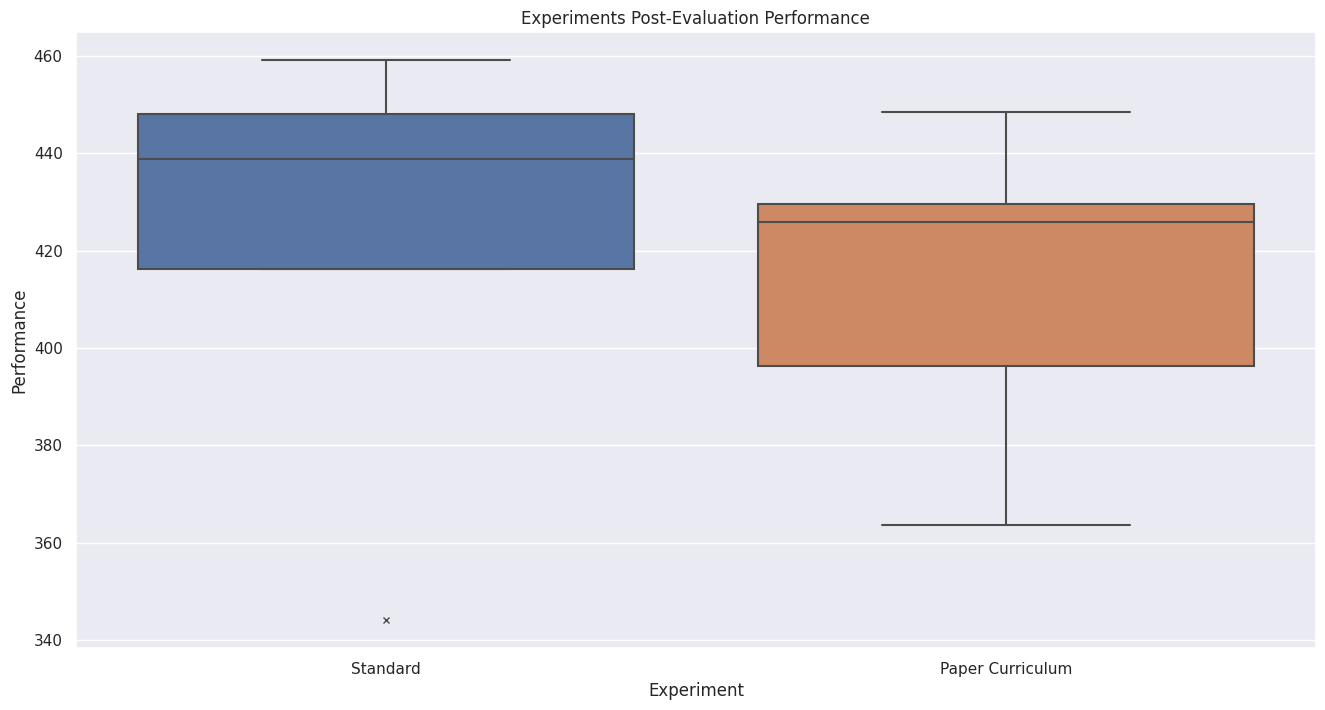

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(16,8)})

df = pd.DataFrame(tests_score)
boxplot = sns.boxplot(df, flierprops={"marker": "x"})
boxplot.set_xticks([i for i in range(len(experiments_name))], experiments_name)
plt.title("Experiments Post-Evaluation Performance")
plt.ylabel("Performance")
plt.xlabel("Experiment")
plt.show()

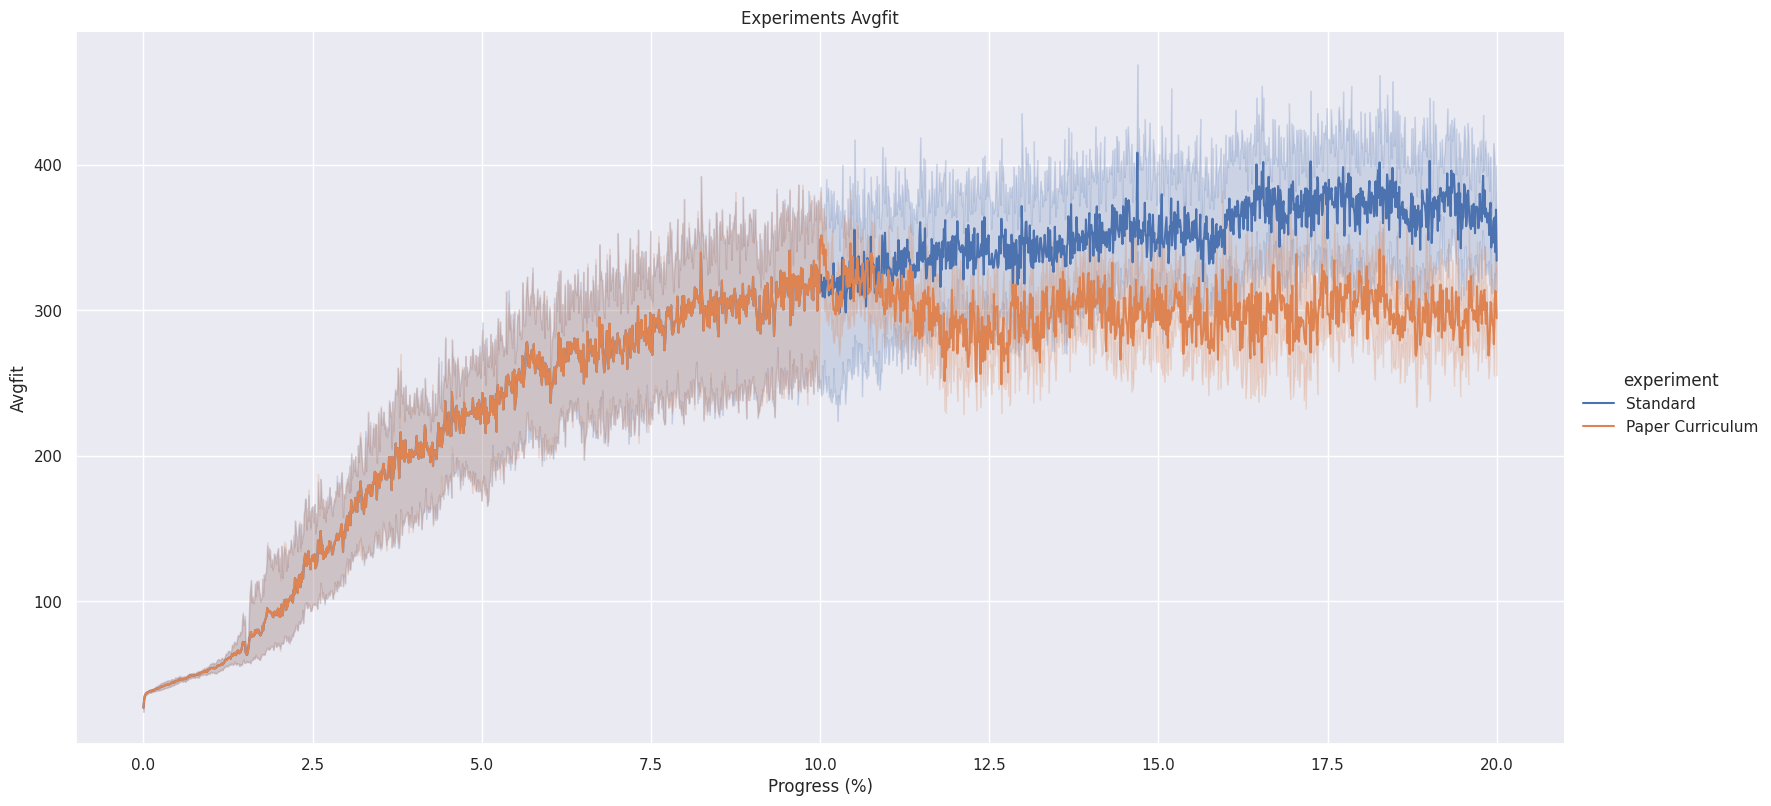

In [7]:
mean_stats = pd.DataFrame()

for i in range(len(experiments)):
    experiment = experiments[i]
    experiment_name = experiments_name[i]
    experiment_df = pd.DataFrame(avgfit[experiment])
    experiment_df = experiment_df.T
    experiment_df.columns = seeds
    
    seeds_df = pd.DataFrame()
    for seed in seeds:
        seed_df = pd.DataFrame({'progress': [i/100 for i in range(len(experiment_df[seed]))], 'performance': experiment_df[seed]})
        seed_df['seed'] = seed

        seeds_df = pd.concat([seeds_df, seed_df], ignore_index=True) if not seeds_df.empty else seed_df

    seeds_df['experiment'] = experiment_name
    mean_stats = pd.concat([mean_stats, seeds_df], ignore_index=True) if not mean_stats.empty else seeds_df

sns.relplot(mean_stats, x='progress', y='performance', hue='experiment', kind='line', estimator='mean', height=8, aspect=2)
plt.title("Experiments Avgfit")
plt.ylabel("Avgfit")
plt.xlabel("Progress (%)")
plt.show()

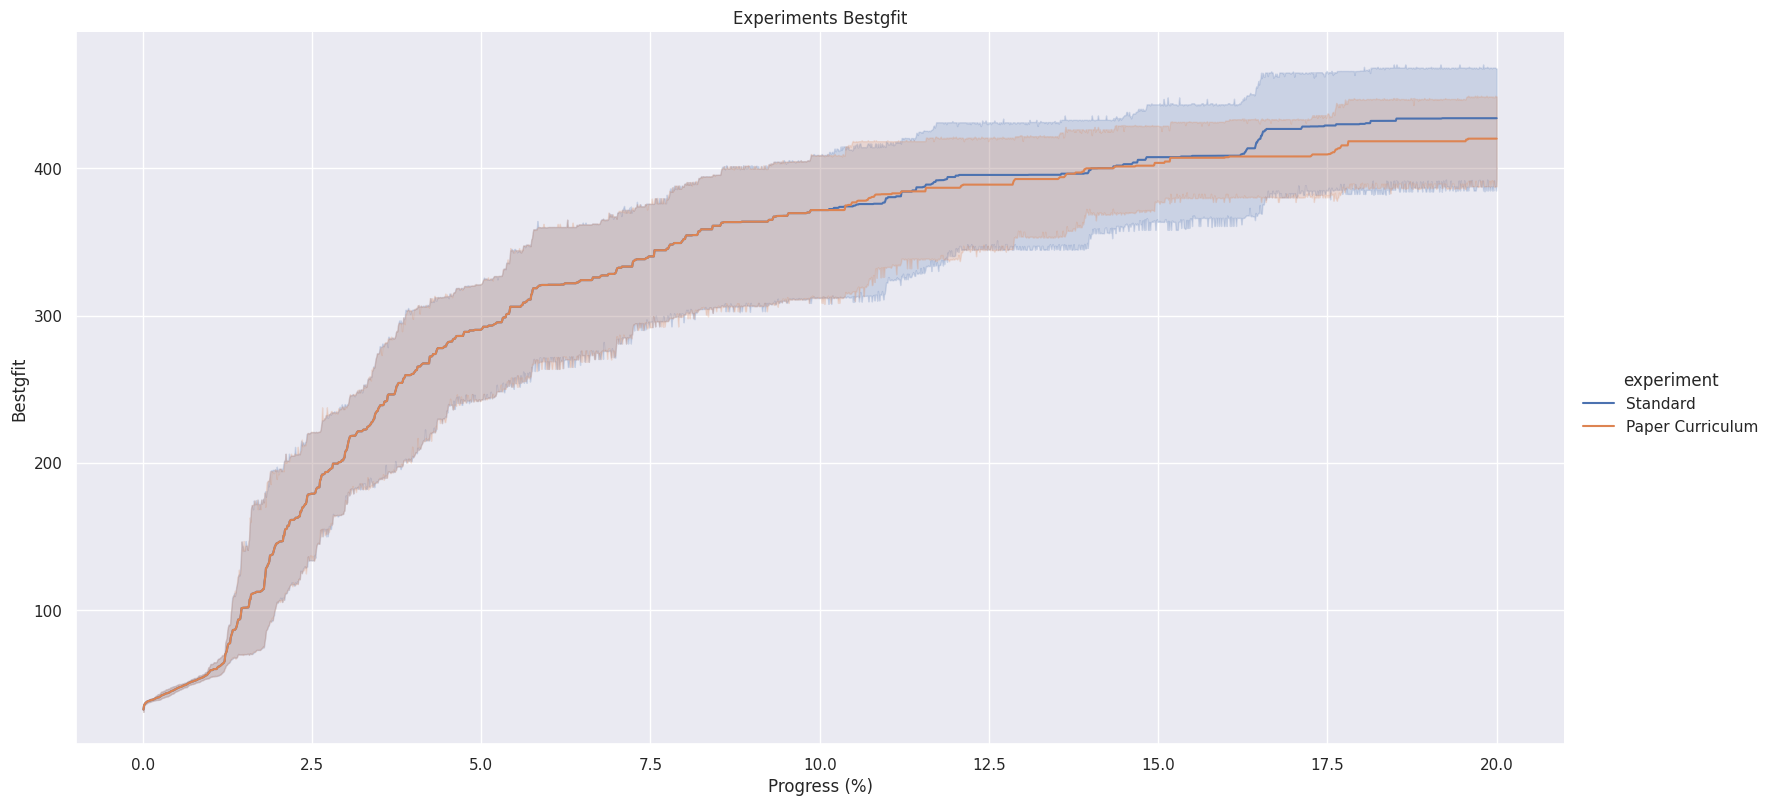

In [8]:
mean_stats = pd.DataFrame()

for i in range(len(experiments)):
    experiment = experiments[i]
    experiment_name = experiments_name[i]
    experiment_df = pd.DataFrame(bestgfit[experiment])
    experiment_df = experiment_df.T
    experiment_df.columns = seeds
    
    seeds_df = pd.DataFrame()
    for seed in seeds:
        performance = [i if i > 0 else None for i in experiment_df[seed]]

        seed_df = pd.DataFrame({'progress': [i/100 for i in range(len(experiment_df[seed]))], 'performance': performance})
        seed_df['seed'] = seed

        seeds_df = pd.concat([seeds_df, seed_df], ignore_index=True) if not seeds_df.empty else seed_df

    seeds_df['experiment'] = experiment_name
    mean_stats = pd.concat([mean_stats, seeds_df], ignore_index=True) if not mean_stats.empty else seeds_df

sns.relplot(mean_stats, x='progress', y='performance', hue='experiment', kind='line', estimator='mean', height=8, aspect=2)
plt.title("Experiments Bestgfit")
plt.ylabel("Bestgfit")
plt.xlabel("Progress (%)")
plt.show()